# Исследование объявлений о продаже квартир



## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,nan,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,nan
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,nan,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,nan,0.000,nan,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,nan,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,nan,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,nan,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.isna().sum(axis=0).sort_values(ascending = False )

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

### Вывод

Пропуски наблюдаются во многих столбцах,но мне кажется что не все столбцы нужны мне для исследования.Я думаю что очень важно заполнить пропуски в столбцах kitchen_area,living_area.По скольку мне кажется что жилая площадь и площадь кухни понадобятся мне для рассчетов

## Предобработка данных

In [4]:
#Я думаю что очень важно заполнить пропуски в столбцах kitchen_area,living_area.
#Я собираюсь категоризировать данные столбца total_area 
#найти в нем среднее значения кухни и жилой площади по каждой из категорий и заполнить пропуски этими значениями
df['total_area_cat'] =  pd.qcut(df['total_area'], q=4)
df['total_area_cat'].value_counts(ascending = False)
#посмотрим среднее значение площади кухни в зависимости от площади квартиры
df.groupby('total_area_cat')['kitchen_area'].agg(['mean','median'])

,mean,median
total_area_cat,,
"(11.999, 40.0]",8.341,8.250
"(40.0, 52.0]",8.814,8.000
"(52.0, 69.9]",9.729,9.000
"(69.9, 900.0]",15.289,13.000


In [5]:
#сделаю тоже самое для жилой площади
df.groupby('total_area_cat')['living_area'].agg(['mean','median'])

,mean,median
total_area_cat,,
"(11.999, 40.0]",17.356,17.200
"(40.0, 52.0]",25.548,27.400
"(52.0, 69.9]",35.891,35.500
"(69.9, 900.0]",59.614,51.300


In [6]:
#заменю значения NAN нулями в данных столбцах:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['living_area'] = df['living_area'].fillna(0)


#хочу написать и применить функцию для замены нулевых значений 



def kitchen(row):
    total = row['total_area']
    kitchen = row['kitchen_area']
    
    if total < 40:
        if kitchen == 0:
            return 8.341194
    if total < 52:
        if kitchen == 0:
            return 8.814083
    if total < 69:
        if kitchen == 0:
            return 9.728811
    if total < 900:
        if kitchen == 0:
            return 15.288620
    if kitchen != 0:
        return kitchen
    
def living(row):
    total = row['total_area']
    living = row['living_area']
    
    if total < 40:
        if living == 0:
            return 17.355543
    if total < 52:
        if living == 0:
            return 25.547984
    if total < 69:
        if living == 0:
            return 35.890699
    if total < 900:
        if living == 0:
            return 59.613725
    if living != 0:
        
        return living
    
    

df['kitchen_area'] = df.apply(kitchen,axis = 1)
df['living_area'] = df.apply(living,axis = 1)

#заменю тип данных в 'days_exposition' и уберу пропуски ,вместо пропусков поставлю 0
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

#заменю тип данных в столбце floors_total и уберу пропуски поставив 0
df['floors_total'] = df['floors_total'].fillna(0).astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16,51.000,8,NaN,...,nan,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,0,"(69.9, 900.0]"
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,nan,11,18.600,1,NaN,...,2.000,посёлок Шушары,12817.000,18603.000,0.000,nan,0.000,nan,81,"(40.0, 52.0]"
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,nan,5,34.300,4,NaN,...,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558,"(52.0, 69.9]"
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,nan,14,59.614,9,NaN,...,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424,"(69.9, 900.0]"
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14,32.000,13,NaN,...,nan,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121,"(69.9, 900.0]"


Заменил нулевые значения в столбцах kitchen_area и living_area.В стобцах days_exposition и floors_total заменил типы данных ,так как мне кажется что в этих столбцах уместнее целые числа

## Расчёты и добавление результатов в таблицу

In [7]:
df['square_meter_price'] = df['last_price'] / df['total_area']
#добавлю в таблицу столбцы с днем,месяцем и годом обьявления

df['day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
#напишу функцию которая принимает в себя столбцы и возвращает какой это этаж

def what_floor_is_it(row):
    total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    if total == floor:
        return 'последний'
    else:
        return 'другой'
    
df['what_floor_is_it'] = df.apply(what_floor_is_it,axis=1)

#Посчитаю и добавлю в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_ratio'] = df['living_area'] / df['total_area']
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']
df[['total_area','living_area','kitchen_area','kitchen_ratio','living_ratio','square_meter_price','last_price']].head(10)



,total_area,living_area,kitchen_area,kitchen_ratio,living_ratio,square_meter_price,last_price
0,108.000,51.000,25.000,0.231,0.472,120370.370,13000000.000
1,40.400,18.600,11.000,0.272,0.460,82920.792,3350000.000
2,56.000,34.300,8.300,0.148,0.612,92785.714,5196000.000
3,159.000,59.614,15.289,0.096,0.375,408176.101,64900000.000
4,100.000,32.000,41.000,0.410,0.320,100000.000,10000000.000
5,30.400,14.400,9.100,0.299,0.474,95065.789,2890000.000
6,37.300,10.600,14.400,0.386,0.284,99195.710,3700000.000
7,71.600,59.614,18.900,0.264,0.833,110544.693,7915000.000
8,33.160,15.430,8.810,0.266,0.465,87454.765,2900000.000
9,61.000,43.600,6.500,0.107,0.715,88524.590,5400000.000


Я создал отдельную таблицу куда добавил удобные для дальнейшего анализа столбцы с данными

## Исследовательский анализ данных

In [8]:
#изучим следующие параметры: площадь, цена, число комнат, высота потолков
curiosity = df[['ceiling_height','total_area','last_price','rooms']]

curiosity['ceiling_height'].describe()

count   14504.000
mean        2.771
std         1.261
min         1.000
25%         2.520
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

In [9]:
curiosity['total_area'].describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

In [10]:
curiosity['last_price'].describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

In [11]:
curiosity['rooms'].describe()

count   23699.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5bfeb190>,
      dtype=object)

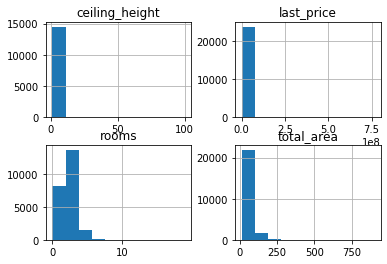

In [12]:
curiosity.hist(bins=10)

В высоте потолков есть странное значение 100 метров,я думаю это явный выброс.Во всех остальных столбцах выделяется квартира 900 метров.Не совсем понятно выброс это или на самом деле есть такая большая квартира.В столбце с количеством комнат есть нулевые значения,скорее всего подразумевается что это студио.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0df7d590>,
      dtype=object)

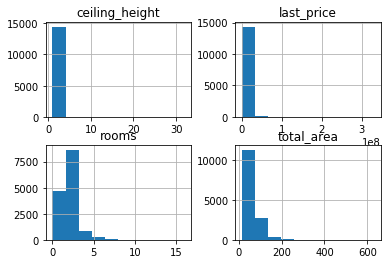

In [13]:
#хочу убрать эти редкие значения и посмтотреть как поменяется гистограма
curiosity.query('ceiling_height < 100 and rooms < 19 and total_area < 900').hist(bins=10)

Убрав явные выбросы можем наблюдать как гистограммы стали больше похожи на распределение Пуассона

In [14]:
#Собираюсь изучить время продажи квартир в столбце days_exposition
df['days_exposition'].describe()

count   23699.000
mean      156.609
std       213.547
min         0.000
25%        22.000
50%        74.000
75%       199.000
max      1580.000
Name: days_exposition, dtype: float64

(-10, 1600)

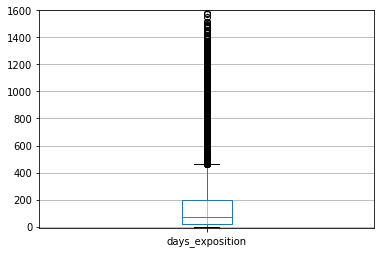

In [15]:
df.boxplot(column='days_exposition')
plt.ylim(-10,1600)

Из описания и из диаграмы размаха видно что выбросов много и они сконцентрированы после значения в 500 дней.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0dcfc390>]],
      dtype=object)

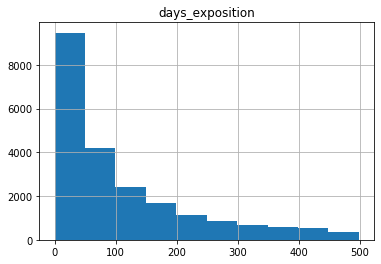

In [16]:
curiosity_2 = df[['days_exposition']]
curiosity_2.query('days_exposition < 500').hist()

Из этой гистограммы видно что большая часть квартир продается в первые 100 дней

In [17]:
#хочу посмотреть как быстро продаются квартиры в зависимости от их квадратуры,для этого я воспользуюсь столбцом в котором
#уже категоризировал квартиры при этом убрав выбросы
curiosity_3 = df.query('days_exposition < 500')

curiosity_3.groupby('total_area_cat')['days_exposition','square_meter_price'].agg('mean')

,days_exposition,square_meter_price
total_area_cat,,
"(11.999, 40.0]",102.215,98009.486
"(40.0, 52.0]",106.080,90802.095
"(52.0, 69.9]",108.155,91020.880
"(69.9, 900.0]",118.748,116828.642


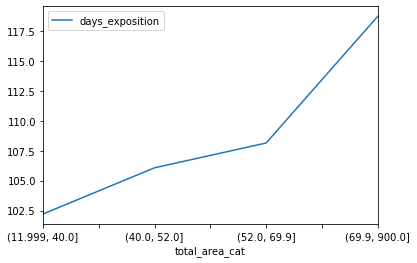

In [18]:
curiosity_3.pivot_table(
    index='total_area_cat',values='days_exposition',aggfunc='mean').plot()

Данная сводная таблица и гистограма подтверждают что в независимости от цены за квадратный метр и площади квартиры,среднее время продажи составляет чуть больше 100 дней.Но так же видно,что чем больше цена и площадь квартиры,тем больше времени потребуется для их продажи.Средние значения не сильно отличаются ,но все же видно как с увеличением стоимости и площади они растут

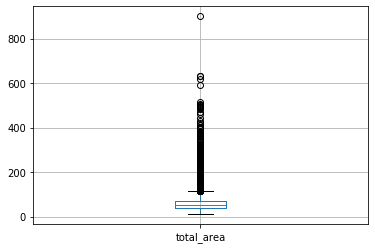

In [19]:
#теперь собираюсь посмотреть как меняется общая стоимость квартиры от общей площади
df.boxplot(column='total_area')

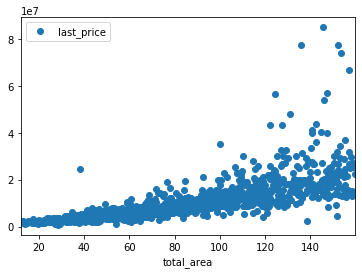

In [20]:
#мне кажется что квартиры пощадью свыге 160м это уже выбросы
df.query('total_area < 160').pivot_table(
    index='total_area',values='last_price',aggfunc='mean').plot(style='o')

In [21]:
df.pivot_table(
    index='total_area_cat',values='last_price',aggfunc=['mean','median'])

,mean,median
,last_price,last_price
total_area_cat,,
"(11.999, 40.0]",3318414.666,3300000.000
"(40.0, 52.0]",4149565.183,4100000.000
"(52.0, 69.9]",5485342.623,5300000.000
"(69.9, 900.0]",13258026.330,9200000.000


Из графика со срезом и из категоризированной таблицы без срезов,мы можем видеть что стоимость квартиры зависит от общей площади

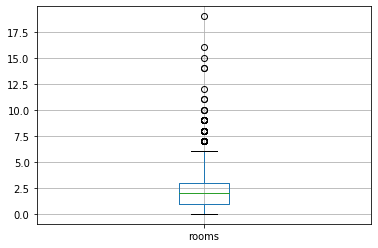

In [22]:
#сейчас хочу осмотреть влияет ли число комнат на общую стоимсоть квартиры
df.boxplot(column='rooms')

In [23]:
#из графика видно что свыше 6 комнат это уже выбросы
df.query('rooms <= 6').pivot_table(index='rooms',values='last_price')

,last_price
rooms,
0,3337724.112
1,3835361.523
2,5591604.784
3,8179118.539
4,13423497.185
5,23762082.092
6,31709751.657


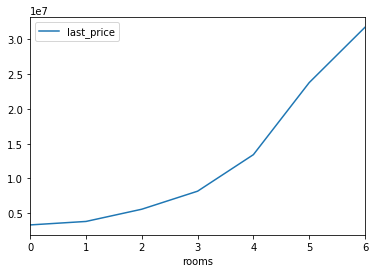

In [24]:
df.query('rooms <= 6').pivot_table(index='rooms',values='last_price').plot()

Количество комнат влияет на стоимость квартиры

In [25]:
#сейчас хочу посмотреть влияет ли на цену то,на каком этаже расположена квартира (первый,последний)
df.pivot_table(index=['what_floor_is_it','total_area_cat'],values='last_price')

last_price
what_floor_is_it total_area_cat             
другой           (11.999, 40.0]  3458425.410
                 (40.0, 52.0]    4385524.971
                 (52.0, 69.9]    5754318.052
                 (69.9, 900.0]  13087775.618
первый           (11.999, 40.0]  2774252.322
                 (40.0, 52.0]    3486253.246
                 (52.0, 69.9]    4604523.527
                 (69.9, 900.0]   9261990.794
последний        (11.999, 40.0]  2962608.320
                 (40.0, 52.0]    3644665.259
                 (52.0, 69.9]    4944927.115
                 (69.9, 900.0]  16725605.413

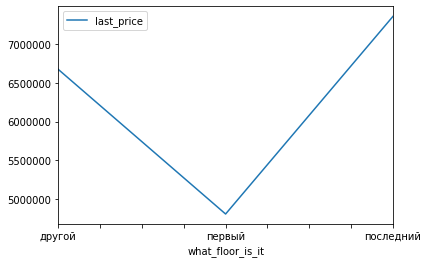

In [26]:
df.pivot_table(index='what_floor_is_it',values='last_price').plot()

Из таблицы и графиков видно,что квартиры на первом этаже стоят дешевле

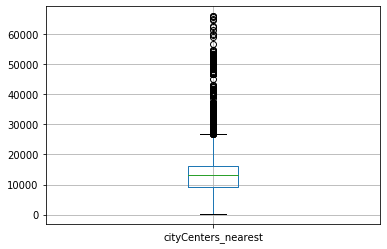

In [27]:
#теперь собираюсь проверить как удаленность от центра влияет на финальную стоимость квартиры
df.boxplot(column='cityCenters_nearest')

In [28]:
#заменю пустые ячейки значением 0 и переведу в километры весь столбец
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
def to_center(row):
    return row // 1000

df['to_centr'] = df['cityCenters_nearest'].apply(to_center)
df['to_centr'].value_counts().head()

0.000     5605
12.000    1517
14.000    1512
11.000    1415
13.000    1402
Name: to_centr, dtype: int64

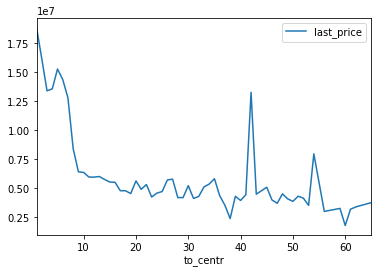

In [29]:
#построю таблицу убрав значение 0
df.query('to_centr != 0').pivot_table(
    index='to_centr',values='last_price').plot()

По графику видно,что чем ближе расстояние до центра тем дороже стоит квартира.Есть странные значения на удаленности 42 км и в районе 55 км.Могу предположить что причиной таких цен в этих точках являются "дорогие" районы.

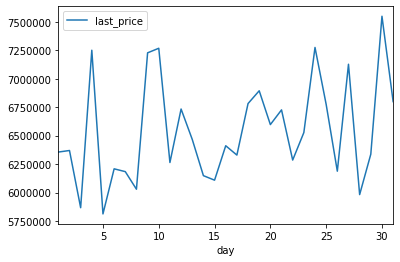

In [30]:
#сейчас собираюсь посмотреть зависимость от даты размещения
df.pivot_table(index='day',values='last_price').plot()

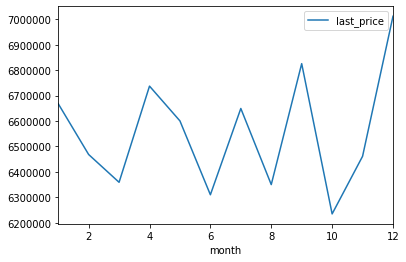

In [31]:
df.pivot_table(index='month',values='last_price').plot()

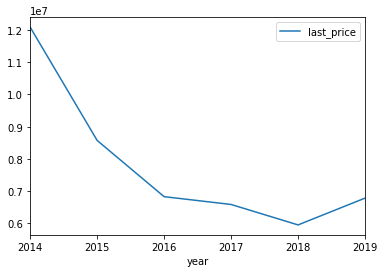

In [32]:
df.pivot_table(index='year',values='last_price').plot()

Исходя из наших таблиц,самые дорогие квартиры в последних числах меяца,что же касается времени года,то обьявления размещенные в период с октября по декабрь самые дорогие.На третем графике можно увидеть что начиная с 2014 года квартиры все вермя дешевели.

In [33]:
#собираюсь посмотреть топ 10 населенных пунктов  с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [34]:
#собираюсь посмтреть в каком из этих пунктов самая высокая и самая низкая стоимость жилья
cities = ['Санкт-Петербург',
          'посёлок Мурино'
          ,'посёлок Шушары',
          'Всеволожск',
          'Всеволожск',
          'Пушкин',
          'Колпино',
          'посёлок Парголово',
          'Гатчина',
          'деревня Кудрово',
          'Выборг'
         ]
df.query('locality_name == @cities').pivot_table(
    index='locality_name',values=['last_price','square_meter_price'],aggfunc = 'mean').sort_values(
    by='last_price',ascending=False)

,last_price,square_meter_price
locality_name,,
Санкт-Петербург,8062507.069,114849.009
Пушкин,6469035.946,103125.819
посёлок Парголово,4488074.798,90175.913
деревня Кудрово,4234157.926,92473.548
посёлок Шушары,4108081.816,78677.364
Колпино,3964021.438,75424.579
Всеволожск,3789067.751,68654.474
посёлок Мурино,3672049.195,85752.189
Гатчина,3488336.678,68746.147


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0d86eb10>],
      dtype=object)

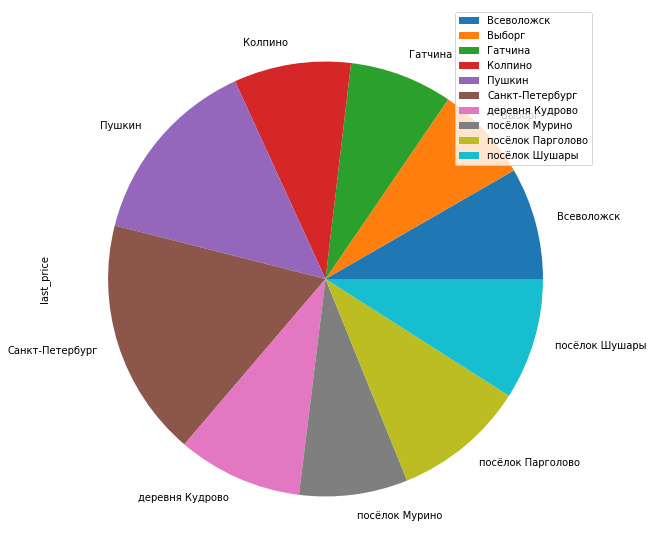

In [35]:
df.query('locality_name == @cities').pivot_table(
    index='locality_name',values='last_price',aggfunc = ('mean')).plot(kind='pie',subplots=True,figsize=(10,10))

Больше всего обьявлений как и самые дорогие квартиры ожидаемо в Санкт-Петербурге.В Выборге меньше обьявлений и стоимость жилья так же самая дешевая.

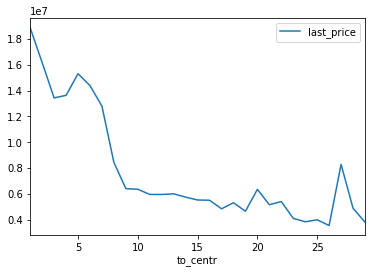

In [36]:
#собираюсь внимательнее изучить квартиры в центре Санкт-Петербурга
df.query('to_centr != 0 and locality_name == "Санкт-Петербург"').pivot_table(
    index='to_centr',values='last_price').plot()

In [37]:
#из графика видно что "центральные" квартиры начинаются с 1 по 9 км от центра
df.query('to_centr != 0 and to_centr < 9 and locality_name == "Санкт-Петербург"').pivot_table(
    index='to_centr',values=['last_price','square_meter_price'])

,last_price,square_meter_price
to_centr,,
1.000,18850851.663,166603.756
2.000,16163313.616,146662.860
3.000,13436830.553,129416.345
4.000,13632024.645,137475.497
5.000,15306121.120,146979.233
6.000,14389106.185,152277.894
7.000,12797673.740,141399.731
8.000,8445271.997,120581.350


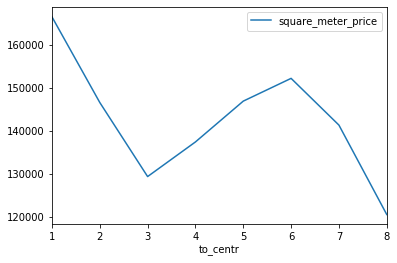

In [38]:
df.query('to_centr != 0 and to_centr < 9 and locality_name == "Санкт-Петербург"').pivot_table(
    index='to_centr',values='square_meter_price').plot()

На графике видно,странное падение цены в районе 3 км,я пока не понял с чем это связано,предполагаю что с особенностями ландшафта города.Я сначала подумал что это может быть из за разницы цен по годам но просмотрев срезы по всем годам я увидел такое же странное значение в этом районе.

In [39]:
df.query('to_centr > 0 and to_centr < 10 and locality_name == "Санкт-Петербург"').pivot_table(
    index=['to_centr','locality_name'],values=['total_area','square_meter_price',
                                              'rooms','ceiling_height'],aggfunc='mean')

,,ceiling_height,rooms,square_meter_price,total_area
to_centr,locality_name,,,,
1.000,Санкт-Петербург,3.224,3.237,166603.756,103.080
2.000,Санкт-Петербург,3.236,3.114,146662.860,98.856
3.000,Санкт-Петербург,3.300,3.019,129416.345,91.548
4.000,Санкт-Петербург,3.121,2.925,137475.497,96.164
5.000,Санкт-Петербург,3.047,2.740,146979.233,93.936
6.000,Санкт-Петербург,2.968,2.338,152277.894,82.903
7.000,Санкт-Петербург,2.810,2.423,141399.731,77.187
8.000,Санкт-Петербург,3.151,2.209,120581.350,67.748
9.000,Санкт-Петербург,2.775,2.028,110012.550,57.698


In [41]:
centr = df[['rooms','to_centr','what_floor_is_it','day','month','year','last_price','locality_name','ceiling_height']]
centr = centr.query('to_centr > 0 and to_centr < 10 and locality_name == "Санкт-Петербург"')

In [42]:
centr.pivot_table(index=['to_centr','what_floor_is_it'],values=['last_price','rooms','ceiling_height'])

ceiling_height   last_price  rooms
to_centr what_floor_is_it                                    
1.000    другой                     3.285 19032050.000  3.279
         первый                     3.136 12941749.975  2.925
         последний                  3.142 22367456.667  3.350
2.000    другой                     3.306 16505438.191  3.197
         первый                     3.081  9113680.488  2.585
         последний                  3.149 19044282.051  3.192
3.000    другой                     3.405 13251536.297  3.149
         первый                     3.049  7343583.333  2.278
         последний                  3.150 17961783.072  3.099
4.000    другой                     3.124 13757324.358  2.875
         первый                     3.067  7896551.149  2.759
         последний                  3.138 16628631.819  3.275
5.000    другой                     3.013 14589198.637  2.698
         первый                     3.036 10912099.000  2.416
         последний                  3.191 21428953.238  3.139
6.000    другой                     2.951 15048155.807  2.330
         первый                     2.957  8610528.395  2.116
         последний                  3.040 14609017.893  2.507
7.000    другой                     2.803 11821362.686  2.366
         первый                     2.821  7261431.639  2.111
         последний                  2.856 23280875.265  3.020
8.000    другой                     2.914  8800227.482  2.217
         первый                     3.394  5819474.576  2.017
         последний                  4.488  8044669.512  2.293
9.000    другой                     2.785  6528893.783  1.977
         первый                     2.734  4964258.065  1.984
         последний                  2.757  6772338.224  2.299

Я не обнаружил очевидной разницы между значениями в центре Санкт Петербурга и общими выводами

## Общий вывод

Я считаю что главными факторами влияющими на стоимость квартры являются:
- Город в котором расположена квартира
- Расстояние до центра города
- Этаж(последний этаж стоит дороже первого)
- Месяц продажи (месяцы с октября по декабрь самые дорогие)
- количесвто комнат
- площадь
Средняя скорость продажи квартир 100 дней ,независимо от ,того какая у квартиры площадь.Продажи до 100 дней можно назвать сверх быстрыми,если же квартира не продается больше 500 дней то это сверхдолгая продажа.



    